# MSDS 7331 Data Mining Lab 2
Professor: Dr. Jake Drew  
Team: Steven Hayden, Josephine MacDaniel, Korey MacVittie, Afreen Siddiqui, Eduardo Cantu

In [1]:
#load Libraries
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt
import matplotlib as mp1
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Data Cleaning / Prepreperation

#### data preperation for model 1 & 2

In [17]:
#Load Data
Accident_df_2016 = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/accident_2016.csv',low_memory=False)
Accident_df_2015 = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/accident_2015.csv',low_memory=False)
Accident_df = pd.concat([Accident_df_2015,Accident_df_2016])


#Load Damage Data
Distract_df = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/distract.csv',low_memory=False)
Damage_df = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/damage.csv',low_memory=False)

#Merge the distract data and damage data
Accident_df = Accident_df.merge(Distract_df,left_on = 'consecutive_number', right_on = 'consecutive_number', how= 'left')
Accident_df = Accident_df.merge(Damage_df,left_on = 'consecutive_number', right_on = 'consecutive_number', how= 'left')


## Data Meaning Type
In this section, we will go over the attributes in our data set, and explain each. These descriptions are taken from the kaggle site for this data, found [here](https://www.kaggle.com/usdot/nhtsa-traffic-fatalities).

There are quite a few variables here - however, many of them are redundant with each other. As should not be surprising when governmental bureaucracy is involved, there are a variety of variables here that are "encoded" and redundant with one another. Much of the information relates to the location of the accident: latitude, longitude, type of roadway, nearest mile marker, type of intersection, and so forth.

| Variable Name | Data Type | Description |
| :- | :- | :- |
| state_number | Interval | Identifies the state in which the crash occurred. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC). For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| state_name | Nominal | Identifies the state in which the crash occurred. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC). |
| consecutive_number | Interval | Unique case number assigned to each crash. It appears on each data file and is used to merge information from the data files together. xxxxxx Two Characters for State Code followed by Four Characters for Case Number. |
| number_of_vehicle_forms_submitted_all | Interval | Count of the total number of vehicles involved. |
| number_of_motor_vehicles_in_transport_mvit | Interval | Count of the number of vehicles in-transport involved in the crash. Legally parked vehicles are not included. |
| number_of_parked_working_vehicles | Interval | Count of the number of parked and working vehicles involved in the crash. |
| number_of_forms_submitted_for_persons_not_in_motor_vehicles | Interval | Number of Person Forms (Not a Motor Vehicle Occupant) that are applicable to this case (i.e., non-occupants). |
| number_of_persons_not_in_motor_vehicles_in_transport_mvit | Interval | Count of the number of non-motorists in the crash. A non-motorist is defined as a pedestrian, a cyclist, an occupant of a motor vehicle not intransport, a person riding a horse, an occupant of an animal drawn conveyance, person associated with non-motorist conveyance (e.g., baby carriage, skate board, wheelchair), or an other non-motorist (e.g., person outside a trafficway, person in a house). |
| number_of_persons_in_motor_vehicles_in_transport_mvit | Interval | Count of the number of motorists in the crash. A motorist is a driver, passenger or unknown occupant type of a motor vehicle in-transport. |
| number_of_forms_submitted_for_persons_in_motor_vehicles | Interval | Count of the number of Person Level (Motor Vehicle Occupant) Forms that are applicable to this case (i.e., occupants). |
| county | Nominal | Records the location of the unstabilized event with regard to the County. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC). |
| city | Nominal | Records the location of the unstabilized event with regard to the City. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC). |
| day_of_crash | Ordinal | Records the day of the month on which the crash occurred. |
| month_of_crash | Ordinal | Records the month in which the crash occurred. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| year_of_crash | Ordinal | Records the year in which the crash occurred. |
| day_of_week | Ordinal | Records the day of the week on which the crash occurred. Sunday is Day 1. |
| hour_of_crash | Ordinal | Records the hour at which the crash occurred. Listed in 24-hour format. |
| minute_of_crash | Ordinal | Records the minutes after the hour at which the crash occurred. |
| national_highway_system | Nominal | Identifies whether this crash occurred on a trafficway that is part of the National Highway System. |
| land_use | Nominal | 1 (Rural), 2 (Urban), 6 (Trafficway Not in State Inventory), 8 (Not Reported) and 9 (Unknown). |
| land_use_name | Nominal | 1 (Rural), 2 (Urban), 6 (Trafficway Not in State Inventory), 8 (Not Reported) and 9 (Unknown). |
| functional_system | Nominal | 01 (Interstate), 02 (Principal Arterial – Other Freeways and Expressways), 03 (Principal Arterial – Other), 04 (Minor Arterial), 05 (Major Collector), 06 (Minor Collector), 07 (Local), 96 (Trafficway Not in State Inventory), 98 (Not Reported), and 99 (Unknown). |
| functional_system_name | Nominal | 01 (Interstate), 02 (Principal Arterial – Other Freeways and Expressways), 03 (Principal Arterial – Other), 04 (Minor Arterial), 05 (Major Collector), 06 (Minor Collector), 07 (Local), 96 (Trafficway Not in State Inventory), 98 (Not Reported), and 99 (Unknown). |
| ownership | Nominal | For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| ownership_name | Nominal | For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| route_signing | Nominal | Identifies the route signing of the trafficway on which the crash occurred, using a coding system. |
| route_signing_name | Nominal | Identifies the route signing of the trafficway on which the crash occurred. |
| trafficway_identifier | Nominal | Records the trafficway on which the crash occurred. |
| trafficway_identifier_2 | Nominal | Records the trafficway on which the crash occurred. |
| milepoint | Interval | Records the milepoint nearest to the location where the crash occurred, if applicable.
| latitude | Interval | Identifies the location of the crash using Global Position coordinates. This is the position of latitude. |
| longitude | Interval | Identifies the location of the crash using Global Position coordinates. |
| special_jurisdiction | Nominal | Identifies if the location on the trafficway where the crash occurred qualifies as a Special Jurisdiction even though it may be patrolled by state, county or local police (e.g., all State highways running through Indian reservations are under the jurisdiction of the Indian reservation). |
| special_jurisdiction_name | Nominal | Identifies if the location on the trafficway where the crash occurred qualifies as a Special Jurisdiction even though it may be patrolled by state, county or local police (e.g., all State highways running through Indian reservations are under the jurisdiction of the Indian reservation). |
| first_harmful_event | Nominal | Describes the first injury or damage producing event of the crash. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| first_harmful_event_name | Nominal | Describes the first injury or damage producing event of the crash. |
| manner_of_collision | Nominal | Describes the orientation of two motor vehicles in-transport when they are involved in the “First Harmful Event” of a collision crash. If the “First Harmful Event” is not a collision between two motor vehicles in-transport it is classified as such. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| manner_of_collision_name | Nominal | Describes the orientation of two motor vehicles in-transport when they are involved in the “First Harmful Event” of a collision crash. If the “First Harmful Event” is not a collision between two motor vehicles in-transport it is classified as such. |
| relation_to_junction_within_interchange_area | Nominal | Identifies the crash's location with respect to presence in an interchange area. The coding of this data element is done in two sub-fields (see also C20B) and is based on the location of the “First Harmful Event” of the crash. (0) No (1) Yes (8) Not Reported (9) Unknown |
| relation_to_junction_specific_location | Nominal | Identifies the crash's location with respect to presence in or proximity to components typically in junction or interchange areas. The coding of this data element is done in two sub-fields (see also C20A) and is based on the location of the “First Harmful Event” of the crash. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| relation_to_junction_specific_location_name | Nominal | Identifies the crash's location with respect to presence in or proximity to components typically in junction or interchange areas. The coding of this data element is done in two sub-fields (see also C20A) and is based on the location of the “First Harmful Event” of the crash. |
| type_of_intersection | Nominal | Identifies and allows separation of various intersection types. (1) Not an Intersection (2) Four-Way Intersection (3) T-Intersection (4) Y-Intersection (5) Traffic Circle (6) Roundabout (7) Five-Point, or More (10) L-Intersection (98) Not Reported (99) Unknown |
| work_zone | Nominal | Identifies a motor vehicle traffic crash in which the first harmful event occurs within the boundaries of a work zone or on an approach to or exit from a work zone, resulting from an activity, behavior, or control related to the movement of the traffic units through the work zone. (0) None (1) Construction (2) Maintenance -- Construction or Maintenance (3) Utility (4) Work Zone, Type Unknown (--) Not Reported |
| relation_to_trafficway | Nominal | Identifies the location of the crash as it relates to its position within or outside the trafficway based on the “First Harmful Event.” For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| relation_to_trafficway_name | Nominal | Identifies the location of the crash as it relates to its position within or outside the trafficway based on the “First Harmful Event.” |
| light_condition | Nominal | Records the type/level of light that existed at the time of the crash as indicated in the case material. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| light_condition_name | Nominal | Records the type/level of light that existed at the time of the crash as indicated in the case material. |
| atmospheric_conditions_1 | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| atmospheric_conditions_1_name | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. |
| atmospheric_conditions_2 | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| atmospheric_conditions_2_name | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. |
| atmospheric_conditions | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| atmospheric_conditions_name | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. |
| school_bus_related | Nominal | Identifies if a school bus, or motor vehicle functioning as a school bus, is related to the crash. (0) No (1) Yes (--) Not Reported |
| rail_grade_crossing_identifier | Nominal | Identifies if the crash occurred in or near a rail grade crossing. |
| hour_of_notification | Interval | Records the hour that emergency medical service was notified, in 24-hour format. |
| minute_of_notification | Interval | Records the minutes after the hour that emergency medical service was notified. |
| hour_of_arrival_at_scene | Interval | Records the hour that emergency medical service arrived on the crash scene, in 24-hour format. |
| minute_of_arrival_at_scene | Interval | Records the minutes after the hour that emergency medical service arrived on the crash scene. |
| hour_of_ems_arrival_at_hospital | Interval | Records the hour that emergency medical service arrived at the treatment facility to which it was transporting victims of the crash, in 24-hour format. |
| minute_of_ems_arrival_at_hospital | Interval | Records the minutes after the hour that emergency medical service arrived at the treatment facility to which it was transporting victims of the crash. |
| related_factors_crash_level_1 | Nominal | Records factors related to the crash expressed by the investigating officer. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| related_factors_crash_level_1_name | Nominal | Records factors related to the crash expressed by the investigating officer. |
| related_factors_crash_level_2 | Nominal | Records factors related to the crash expressed by the investigating officer. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| related_factors_crash_level_2_name | Nominal | Records factors related to the crash expressed by the investigating officer. |
| related_factors_crash_level_3 | Nominal | Records factors related to the crash expressed by the investigating officer. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| related_factors_crash_level_3_name | Nominal | Records factors related to the crash expressed by the investigating officer. |
| number_of_fatalities | Interval | Records the number of fatally injured persons in the crash. |
| number_of_drunk_drivers | Interval | Records the number of drunk drivers involved in the crash. |
| timestamp_of_crash | Nominal | This data element records the date and time on which the crash occurred. |
| Clock points | Nominal | Records the count of damage points on the side of the vehicles. |
| No Damage | Nominal | Records the count of vehicles with no damage. |
| Top | Nominal | Records the count of vehicles with damage on the roof. |
| Undercarriage | Nominal | Records the count of vehicles with damage on the undercarriage. |
| Unknown | Nominal | Records the count of vehicles with unknow damage on. |
| By a Moving Object in Vehicle | Nominal | Count of drivers that were distracted by a moving object in the vehicle. |
| By Other Occupant(s) | Nominal | Count of drivers that were distracted by other occupant(s). |
| Careless/Inattentive | Nominal | Count of drivers that were careless or inattentive. |
| Distracted by Outside Person, Object or Event | Nominal | Count of drivers that were distracted by outside Person, Object or Event |
| Distraction (Distracted), Details Unknown | Nominal | Count of drivers that were distracted by a unknown reason. |
| Distraction/Inattention | Nominal | Count of drivers that were inattentive. |
| Eating or Drinking | Nominal | Count of drivers that were eating or drinking. |
| Inattention (Inattentive), Details Unknown | Nominal | count of drivers that were inattentive with unkown details. |
| Looked But Did Not See | Nominal | Count of drivers that looked but did not see. |
| Lost In Thought/Day Dreaming | Nominal | Count of drivers that lost in thought/day dreaming. |
| No Driver Present/Unknown if Driver Present | Nominal | Count of vehicles unknows if driver was present. |
| Not Distracted | Nominal | Count of drivers that were not distracted. |
| Not Reported | Nominal | Count of vehicles that did not have a distraction reported. |
| Other Cellular Phone Related | Nominal | Count of drivers that were distracted related to a cell phone. |
| Other Distraction | Nominal | Count of drivers that were distracted due to other circumstances. |
| Smoking Related | Nominal | Count of drivers that were distracted due to smoking. |
| Unknown if Distracted | Nominal | Count of drivers that were unknow if they were distracted. |
| While Adjusting Audio or Climate Controls | Nominal | Count of drivers that were distracted adjusting audio or climate controls. |
| While Manipulating Cellular Phone | Nominal | Count of drivers that were distracted manipulating a cell phone. |
| While Talking or Listening to Cellular Phone | Nominal | Count of drivers that were distracted due Talking/Listening to a cell phone. |
| While Using or Reaching For Device/Object Brought Into Vehicle | Nominal | Count of drivers that were distracted due to using or reaching for device/object. |
| While Using Other Component/Controls Integral to Vehicle | Nominal | Count of drivers that were distracted due to using other component/controls integral to vehicle. |

In [18]:
# Displays the record count of non-null Values per attribute and their data type. 
Accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66978 entries, 0 to 66977
Data columns (total 99 columns):
Unnamed: 0                                                        66978 non-null int64
state_number                                                      66978 non-null int64
state_name                                                        66978 non-null object
consecutive_number                                                66978 non-null int64
number_of_vehicle_forms_submitted_all                             66978 non-null int64
number_of_motor_vehicles_in_transport_mvit                        66978 non-null int64
number_of_parked_working_vehicles                                 66978 non-null int64
number_of_forms_submitted_for_persons_not_in_motor_vehicles       66978 non-null int64
number_of_persons_not_in_motor_vehicles_in_transport_mvit         66978 non-null int64
number_of_persons_in_motor_vehicles_in_transport_mvit             66978 non-null int64
number_of_forms_subm

In [19]:
#check for duplicate records. It displays the maximum count of a duplicated record. 
#Any value greater than 1 would mean that the data has duplicates
Accident_df['consecutive_number'].value_counts().max()

2

In [20]:
#Drop duplicate records and keeps the most recent record. We assume the most resent is the most accurate 
Accident_df = Accident_df.drop_duplicates(['consecutive_number'],keep = 'last')

#check for duplicate records. It displays the maximum count of a duplicated record . 
#Any value greater than 1 would mean that the data has duplicates
Accident_df['consecutive_number'].value_counts().max()

1

In [21]:
# Store data for Model 2 before any manipulation 
Accident_df_2 = Accident_df

##### Data preperation for Within NFPA standard Model

There are many accidents with missing data regarding the crash time and the arrival time of responders. This information is necessary for the dependent variable, and in turn is crucial for our analysis. That is why we decided to drop these records with missing data, instead of imputing the gaps with the mean. The amount of records dropped is about a third of the original data set, but we have sufficient records that this should not prove to be a problem.

In [22]:
#Remove any recoreds without  time informaiton for arival and crash time
count_no_rec= Accident_df[(Accident_df['hour_of_crash']>24) | (Accident_df['hour_of_arrival_at_scene']>24)]
Accident_df = Accident_df[(Accident_df['hour_of_crash']<=24) & (Accident_df['hour_of_arrival_at_scene']<=24)]
print(count_no_rec.consecutive_number.count(), 'records were removed due to missing time data.') 


19149 records were removed due to missing time data.


In [23]:
# Add a new Feature. This is the ratio between the number of fatalities and the people involved in the accident.
Accident_df['Fatalities_ratio'] = Accident_df.number_of_fatalities/(Accident_df.number_of_persons_not_in_motor_vehicles_in_transport_mvit + Accident_df.number_of_persons_in_motor_vehicles_in_transport_mvit)

#Converts hour and min to datetime type
#crash
Accident_df.hour_of_crash = pd.to_timedelta(Accident_df.hour_of_crash,unit ='h')
Accident_df.minute_of_crash= pd.to_timedelta(Accident_df.minute_of_crash,unit ='m')
#arrival
Accident_df.hour_of_arrival_at_scene = pd.to_timedelta(Accident_df.hour_of_arrival_at_scene,unit ='h')
Accident_df.minute_of_arrival_at_scene = pd.to_timedelta(Accident_df.minute_of_arrival_at_scene,unit ='m')

#concatenates Hour and Minutes together 
Accident_df['Crash_Time'] = Accident_df['hour_of_crash'] + Accident_df['minute_of_crash'] 
Accident_df['Arrival_Time'] = Accident_df['hour_of_arrival_at_scene'] + Accident_df['minute_of_arrival_at_scene']
#creates a response_time variable from the two fields above and converts to min
Accident_df['Response_Time'] = Accident_df['Arrival_Time'] - Accident_df['Crash_Time']
total_response_time_in_min = pd.DatetimeIndex(Accident_df['Response_Time'])
Accident_df['Response_Time']= total_response_time_in_min.hour * 60 + total_response_time_in_min.minute


#gut check of calculation 
Accident_df[['hour_of_crash','minute_of_crash','Crash_Time','hour_of_arrival_at_scene','minute_of_arrival_at_scene','Arrival_Time','Response_Time']].head()

C:\Users\shayden\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shayden\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\shayden\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,hour_of_crash,minute_of_crash,Crash_Time,hour_of_arrival_at_scene,minute_of_arrival_at_scene,Arrival_Time,Response_Time
196,20:00:00,00:47:00,20:47:00,21:00:00,00:01:00,21:01:00,14
240,19:00:00,00:10:00,19:10:00,19:00:00,00:24:00,19:24:00,14
274,14:00:00,00:18:00,14:18:00,14:00:00,00:25:00,14:25:00,7
312,23:00:00,00:23:00,23:23:00,23:00:00,00:29:00,23:29:00,6
959,16:00:00,00:01:00,16:01:00,16:00:00,00:12:00,16:12:00,11


The National Fire Protection Association (NFPA) has established a standard for response time and procedures for Emergency Medical Services (EMS) to adhere to.

From EMSword.com, "The NFPA 1710 standard is based upon a combination of accepted practices and more than 30 years of study, research, testing and validation. Members of the 1710 committee that developed the standard include representatives from various fire agencies and the International Association of City/County Managers (ICMA)."

The NFPA 1710 standard allows for a one-minute call for evaluation and preparation, and four minutes for the arrival of a unit with first responders. For a situation that requires advanced life support equipment, such as an ambulance, the standard is eight minutes after call preparation.  

We chose to use their standards as a threshold to determine if paramedics got to the scene of the accident "in time." This would be a binary response of "0" for not arriving within 9 minutes of the accident, with "1" representing being within the 9 minutes. 

Source: https://www.emsworld.com/article/10324786/ems-response-time-standards

In [24]:
#creates the binary variable 'within 9 minutes NFPA standard'
Accident_df['within 9 minutes NFPA standard'] = np.where(Accident_df['Response_Time']<=9,1,0)
#Accident_df[['Response_Time','within 9 minutes NFPA standard']].head(10) # Verify the binary variable

C:\Users\shayden\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Since the logistic regression will predict if the paramedics arrived to the scene of the accident within the target window, we would select the attributes that we think affect this variable. Generally, we suspect that weather conditions, type of road, and state may play a role.
First we would check what columns are available.

In [25]:
#Displays all the available attributes on the dataset
Accident_df.count()

Unnamed: 0                                                        16230
state_number                                                      16230
state_name                                                        16230
consecutive_number                                                16230
number_of_vehicle_forms_submitted_all                             16230
number_of_motor_vehicles_in_transport_mvit                        16230
number_of_parked_working_vehicles                                 16230
number_of_forms_submitted_for_persons_not_in_motor_vehicles       16230
number_of_persons_not_in_motor_vehicles_in_transport_mvit         16230
number_of_persons_in_motor_vehicles_in_transport_mvit             16230
number_of_forms_submitted_for_persons_in_motor_vehicles           16230
county                                                            16230
city                                                              16230
day_of_crash                                                    

From all the attributes in the dataset, we will select a subset to predict whether or not emergency responders would respond within the target window.

* **state_name:** Due to differences in size and funding, it is possible that the state in which an accident occurs may play a role.
* **route_signing_name:** The type of roadway will probably play a role, as some road types may cover areas that are more distant from dispatch locations.
* **light_condition_name:** The local lighting would certainly seem to be important in determining if responders are able to respond in time: darkness is more dangerous to drive in than light.
* **atmospheric_conditions_name:** Weather conditions will almost certainly play a role.
* **within 9 minutes NFPA standard:** Our response variable. A 1 indicates that emergency services responded within the target window, which is 9 minutes. A 0 indicates that responders arrived outside the target window.

In [59]:
#Make a copy of the original Data
Accident_for_Model=Accident_df.copy()

# 1. Remove attributes that just arent useful for us
for col in ['Unnamed: 0',
             'state_number',
             'consecutive_number',
             'county',
             'city',
             'day_of_crash',
             'month_of_crash',
             'year_of_crash',
             'day_of_week',
             'hour_of_crash',
             'minute_of_crash',
             'national_highway_system',
             'land_use',
             'land_use_name',
             'functional_system',
             'functional_system_name',
             'ownership',
             'ownership_name',
             'route_signing',
             'trafficway_identifier',
             'trafficway_identifier_2',
             'latitude',
             'longitude',
             'special_jurisdiction',
             'special_jurisdiction_name',
             'first_harmful_event',
             'first_harmful_event_name',
             'manner_of_collision',
             'manner_of_collision_name',
             'relation_to_junction_within_interchange_area',
             'relation_to_junction_specific_location',
             'relation_to_junction_specific_location_name',
             'type_of_intersection',
             'work_zone',
             'relation_to_trafficway',
             'relation_to_trafficway_name',
             'light_condition',
             'atmospheric_conditions_1',
             'atmospheric_conditions_1_name',
             'atmospheric_conditions_2',
             'atmospheric_conditions_2_name',
             'atmospheric_conditions',
             'school_bus_related',
             'rail_grade_crossing_identifier',
             'hour_of_notification',
             'minute_of_notification',
             'hour_of_arrival_at_scene',
             'minute_of_arrival_at_scene',
             'hour_of_ems_arrival_at_hospital',
             'minute_of_ems_arrival_at_hospital',
             'related_factors_crash_level_1',
             'related_factors_crash_level_1_name',
             'related_factors_crash_level_2',
             'related_factors_crash_level_2_name',
             'related_factors_crash_level_3',
             'related_factors_crash_level_3_name',
             'milepoint',
             'number_of_parked_working_vehicles',
             'number_of_forms_submitted_for_persons_not_in_motor_vehicles',
             'number_of_persons_not_in_motor_vehicles_in_transport_mvit',
             'number_of_persons_in_motor_vehicles_in_transport_mvit',
             'number_of_forms_submitted_for_persons_in_motor_vehicles',
             'timestamp_of_crash',
             'number_of_fatalities',
             'number_of_drunk_drivers',
             'Fatalities_ratio',
             'number_of_vehicle_forms_submitted_all',
             'Crash_Time',
             'Arrival_Time',
             'Response_Time',
             'number_of_motor_vehicles_in_transport_mvit',
             'By a Moving Object in Vehicle',
             'By Other Occupant(s)',
             'Careless/Inattentive',
             'Distracted by Outside Person, Object or Event',
             'Distraction (Distracted), Details Unknown',
             'Distraction/Careless',
             'Distraction/Inattention',
             'Eating or Drinking',
             'Inattention (Inattentive), Details Unknown',
             'Looked But Did Not See',
             'Lost In Thought/Day Dreaming',
             'No Driver Present/Unknown if Driver Present',
             'Not Distracted',
             'Not Reported',
             'Other Cellular Phone Related',
             'Other Distraction',
             'Smoking Related',
             'Unknown if Distracted',
             'While Adjusting Audio or Climate Controls',
             'While Manipulating Cellular Phone',
             'While Talking or Listening to Cellular Phone',
             'While Using or Reaching For Device/Object Brought Into Vehicle',
             'While Using Other Component/Controls Integral to Vehicle',
             'Clock points',
             'No Damage',
             'Top',
             'Undercarriage',
             'Unknown']:
                    if col in Accident_for_Model:
                        del Accident_for_Model[col]
# List the columns left in the df
list(Accident_for_Model)


['state_name',
 'route_signing_name',
 'light_condition_name',
 'atmospheric_conditions_name',
 'within 9 minutes NFPA standard']

Any observation value on the selected attributes that is reported as *Unknown*, *Other*, or *Not Reported* would be removed from the dataset. These values do not bring any value when it comes to predicting the response time of the paramedics, and are effectively a non-value for our purposes.

In [60]:
# Check for columns that might not be needed
print("Unique values for 'route_signing_name':" , Accident_for_Model.atmospheric_conditions_name.unique(), "\n")
print("Unique values for 'atmospheric_conditions_name':" , Accident_for_Model.atmospheric_conditions_name.unique(), "\n")
print("Unique values for 'light_condition_name':" , Accident_for_Model.light_condition_name.unique())


Unique values for 'route_signing_name': ['Rain' 'Snow' 'Clear' 'Cloudy' 'Unknown' 'Sleet, Hail' 'Blowing Snow'
 'Not Reported' 'Fog, Smog, Smoke' 'Severe Crosswinds'
 'Freezing Rain or Drizzle' 'Blowing Sand, Soil, Dirt' 'Other'] 

Unique values for 'atmospheric_conditions_name': ['Rain' 'Snow' 'Clear' 'Cloudy' 'Unknown' 'Sleet, Hail' 'Blowing Snow'
 'Not Reported' 'Fog, Smog, Smoke' 'Severe Crosswinds'
 'Freezing Rain or Drizzle' 'Blowing Sand, Soil, Dirt' 'Other'] 

Unique values for 'light_condition_name': ['Dark – Not Lighted' 'Daylight' 'Dark – Lighted' 'Dusk' 'Dawn'
 'Dark – Unknown Lighting' 'Not Reported' 'Unknown' 'Other']


In [61]:
# Removes observations with an unknown informaiton in the route, atmospheric conditions and state name
Accident_for_Model= Accident_for_Model[(Accident_for_Model['route_signing_name'] != 'Unknown')]
Accident_for_Model= Accident_for_Model[(Accident_for_Model['route_signing_name'] != 'Other')]
Accident_for_Model= Accident_for_Model[(Accident_for_Model['atmospheric_conditions_name'] != 'Unknown')]
Accident_for_Model= Accident_for_Model[(Accident_for_Model['atmospheric_conditions_name'] != 'Other')]
Accident_for_Model= Accident_for_Model[(Accident_for_Model['atmospheric_conditions_name'] != 'Not Reported')]
Accident_for_Model= Accident_for_Model[(Accident_for_Model['light_condition_name'] != 'Unknown')]
Accident_for_Model= Accident_for_Model[(Accident_for_Model['light_condition_name'] != 'Other')]
Accident_for_Model= Accident_for_Model[(Accident_for_Model['light_condition_name'] != 'Not Reported')]
Accident_for_Model.count()

state_name                        14706
route_signing_name                14706
light_condition_name              14706
atmospheric_conditions_name       14706
within 9 minutes NFPA standard    14706
dtype: int64

Here we have confirmed that the undesired observations have been removed from the dataset.

In [62]:
print("Unique values for 'route_signing_name':" , Accident_for_Model.atmospheric_conditions_name.unique(), "\n")
print("Unique values for 'atmospheric_conditions_name':" , Accident_for_Model.atmospheric_conditions_name.unique(), "\n")
print("Unique values for 'light_condition_name':" , Accident_for_Model.light_condition_name.unique())

Unique values for 'route_signing_name': ['Rain' 'Snow' 'Clear' 'Cloudy' 'Sleet, Hail' 'Blowing Snow'
 'Fog, Smog, Smoke' 'Severe Crosswinds' 'Freezing Rain or Drizzle'
 'Blowing Sand, Soil, Dirt'] 

Unique values for 'atmospheric_conditions_name': ['Rain' 'Snow' 'Clear' 'Cloudy' 'Sleet, Hail' 'Blowing Snow'
 'Fog, Smog, Smoke' 'Severe Crosswinds' 'Freezing Rain or Drizzle'
 'Blowing Sand, Soil, Dirt'] 

Unique values for 'light_condition_name': ['Dark – Not Lighted' 'Daylight' 'Dark – Lighted' 'Dusk' 'Dawn'
 'Dark – Unknown Lighting']


In [63]:
# Rearrange colums
Accident_forLr=Accident_for_Model[['within 9 minutes NFPA standard','state_name','route_signing_name','atmospheric_conditions_name','light_condition_name']]
#list(Accident_forLr)  # Check for the correct column sequence

The section below will perform a one-hot encoding of the variables on the dataset. This is to prepare the data in such a way that can be use for our logistic regresion.

In [64]:
# perform one-hot encoding of the categorical data "state_name"
tmp_state_df = pd.get_dummies(Accident_for_Model.state_name,prefix='state')
#tmp_state_df.head(20)

# perform one-hot encoding of the categorical data "route_signing_name"
tmp_route_df = pd.get_dummies(Accident_for_Model.route_signing_name,prefix='route')
#tmp_route_df.head(20)

# perform one-hot encoding of the categorical data "atmospheric_conditions_name"
tmp_atmos_df = pd.get_dummies(Accident_for_Model.atmospheric_conditions_name,prefix='atmos')
#tmp_atmos_df.head(20)

# perform one-hot encoding of the categorical data "atmospheric_conditions_name"
tmp_light_df = pd.get_dummies(Accident_for_Model.light_condition_name, prefix='light')
#tmp_atmos_df.head(20)

Accident_for_Model = pd.concat((Accident_for_Model,tmp_state_df,tmp_route_df,tmp_atmos_df,tmp_light_df), axis=1) # add back into the dataframe
list(Accident_for_Model)
#delete the categorical variable columns
del Accident_for_Model['state_name']
del Accident_for_Model['route_signing_name']
del Accident_for_Model['atmospheric_conditions_name']
del Accident_for_Model['light_condition_name']

#list(Accident_for_Model) # Check for the last colums

## Within NFPA standard Model

### Data Split and Cross Validation Setup
We will be splitting the dataset  into a Training and Test set for the models. The split is going to be 80 % for training and the other 20 % for testing. The ratio used is accepted split in the research community, and we did not see any reason to deviate from this ratio. A Cross Validation of ten fold would be performed to validate the models. 

* Binary Response: *"within 9 minutes NFPA standard"*

|Value|Description|
|-----|:-----------|
|0| Time of arrival > 9 minutes|
|1| Time of arrival <=9 minutes|

* To ensure that we use the same randomly-selected test and training sets each time we perform the cross-validation, we have specifically set a seed for our random number generator

In [67]:
# Code addapted from the Dataming Notbooks. Logistic Regression Notbook 4.
#URL: https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'within 9 minutes NFPA standard' in Accident_forLr:
    y = Accident_for_Model['within 9 minutes NFPA standard'].values # get the labels we want
    del Accident_for_Model['within 9 minutes NFPA standard'] # get rid of the class label
    X = Accident_for_Model.values # use everything else to predict!
    
        ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
        #    have converted them into simple matrices to use with scikit learn

# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 10  #number of Cross Validation folds
num_instances = len(y)

# Cross Validation Object
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,
                         random_state=0)
                         
print(X) # This prints all the dependant variables
print(cv_object) # This print the Data split object






[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)


### Logistic Regression Model Setup  
This will use the **cv_object** to run the cross validation for the logistic regression on the *within 9 minutes NFPA standard* binary varable. At this point the data has been split into training and test. 

The setup for this model would be:
* **Penalty: L2**  
    L2-Norm also known as least square error (LSE). This will be used for the penalization in the model.
* **Cost (C): 1**  
    The value of '1' is the defaul for this logistic regression. In combination with the penalty L2, the smaller values of C (<1) will constrain the model, on the other hand large values will give more freedom to the model. 
    
* **Class_Weight: None**  
    Since the response variable is nearly balance, where 44% are '1' and 56% are '0'. We would leave this parameter as None.

In [ ]:
# Code addapted from the Dataming Notbooks. Logistic Regression Notbook 4.
#URL: https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
OnTime_lr_clf = LogisticRegression(penalty='l2', C=1, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
acc_List = []
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    OnTime_lr_clf.fit(X_train,y_train)  # train object
    y_hat = OnTime_lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    acc_List.append(acc)
    iter_num+=1

    
# The Code above randomly creates a new training and testing set
# so there will multiple accuracy measurements
# We have taken the of all these measurements below

print('\n','\n','\n','\n',"==========================") 
print("average accuracy",np.mean(acc_List))


The mean of the 10-fold cross validation is indicated above. This value is using the selected parameter values described earlier.

### Tree Ensemble Comparisons setup

In [70]:
# Code to run through the cross validation loop and set the training and testing variable for one single iteration 
#Code addapted from the Dataming Notbooks. Logistic Regression and SVM Notbook 4
#URL: https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb
from sklearn.preprocessing import StandardScaler
for train_indices, test_indices in cv_object.split(X,y): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
#scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

C:\Users\shayden\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shayden\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shayden\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [71]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score


num_estimators = 50
# lets train some trees
clf_array = [
    ('Stump',              DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)),
    ('Tree',               DecisionTreeClassifier()),
    ('Random Trees',       RandomForestClassifier(max_depth=50, n_estimators=num_estimators)),
    ('Extra Random Trees', ExtraTreesClassifier(n_estimators=num_estimators,min_samples_split=2)),
    ('Boosted Tree',       GradientBoostingClassifier(n_estimators=num_estimators)), #takes a long time
    ]

for clf in clf_array:
    acc = cross_val_score(clf[1],X_train_scaled,y_train)
    print (clf[0], acc.mean())

Stump 0.602431530287343
Tree 0.6201967222524165
Random Trees 0.6244474469705806
Extra Random Trees 0.6241919547992797
Boosted Tree 0.6488436221008292
Wall time: 8.92 s


#### Data preperation for Multiple Fatalities Model

Not sure if we want to remove the records that do not have any data in damage or distraction data set

In [26]:
#Remove any recoreds without  damage and distraction informaiton for the crash

#Damage NaN
damage_null=Accident_df_2[(Accident_df_2['No Damage'].isnull())]
Accident_df_2 = Accident_df_2[pd.notnull(Accident_df_2['No Damage'])]

#Distract NaN
distract_null=Accident_df_2[(Accident_df_2['Not Distracted'].isnull())]
Accident_df_2 = Accident_df_2[pd.notnull(Accident_df_2['Not Distracted'])]

#Accident_df_2['Other Distraction']
print(damage_null.consecutive_number.count(),'records were removed due to missing damage data.') 
print(distract_null.consecutive_number.count(),'records were removed due to missing distraction data.') 


978 records were removed due to missing damage data.
0 records were removed due to missing distraction data.


We will create the Multiple_Fatalities classification to be the dependent variable for Model 2. This will be binary using ‘1’ to indicate that there is more than 1 fatality in the accident and ‘0’, if it is not a multiple fatality accident. 

In [28]:
#creates the binary variable for clasificaiton 'Multiple_Fatalities'
Accident_df_2['Multiple_Fatalities'] = np.where(Accident_df_2['number_of_fatalities'] > 1,1,0)


Create a scatter matrix for damage variables and the dependent variable

In [29]:
# This creates a data frame of only variables that we want to examine visually  
Accident_forScatter=Accident_df_2[['Multiple_Fatalities','Clock points','No Damage','Top','Undercarriage','Unknown']]

            
# Dislplays the data types of the variables
Accident_forScatter.dtypes

Multiple_Fatalities      int32
Clock points           float64
No Damage              float64
Top                    float64
Undercarriage          float64
Unknown                float64
dtype: object

''

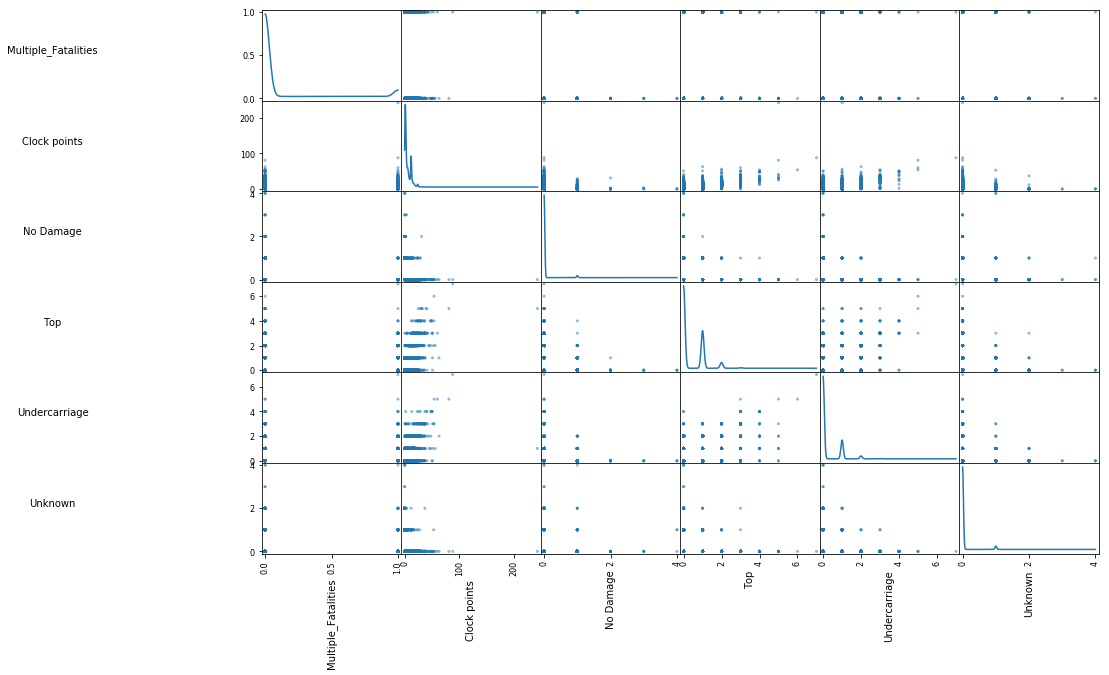

In [30]:
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

ax = scatter_matrix(Accident_forScatter,figsize=(15, 10),diagonal='kde')
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 10,  rotation=0) for item in ax.ravel()]

#x labels
[plt.setp(item.xaxis.get_label(), 'size', 10, rotation=90) for item in ax.ravel()]

#need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1.5,0.5) for s in ax.reshape(-1)]
;

Create a scatter matrix for distract variables and the dependent variable

In [31]:
# This creates a data frame of only variables that we want to examine visually  
Accident_forScatter=Accident_df_2[['Multiple_Fatalities',
                                   'By a Moving Object in Vehicle',
                                   'By Other Occupant(s)',
                                   'Careless/Inattentive',
                                   'Distracted by Outside Person, Object or Event',
                                   'Distraction (Distracted), Details Unknown',
                                   'Distraction/Inattention','Eating or Drinking',
                                   'Inattention (Inattentive), Details Unknown',
                                   'Looked But Did Not See',
                                   'Lost In Thought/Day Dreaming',
                                   'No Driver Present/Unknown if Driver Present',
                                   'Not Distracted','Not Reported',
                                   'Other Cellular Phone Related',
                                   'Other Distraction',
                                   'Smoking Related',
                                   'Unknown if Distracted',
                                   'While Adjusting Audio or Climate Controls',
                                   'While Manipulating Cellular Phone',
                                   'While Talking or Listening to Cellular Phone',
                                   'While Using or Reaching For Device/Object Brought Into Vehicle',
                                   'While Using Other Component/Controls Integral to Vehicle']]

            
# Dislplays the data types of the variables
Accident_forScatter.dtypes

Multiple_Fatalities                                                 int32
By a Moving Object in Vehicle                                     float64
By Other Occupant(s)                                              float64
Careless/Inattentive                                              float64
Distracted by Outside Person, Object or Event                     float64
Distraction (Distracted), Details Unknown                         float64
Distraction/Inattention                                           float64
Eating or Drinking                                                float64
Inattention (Inattentive), Details Unknown                        float64
Looked But Did Not See                                            float64
Lost In Thought/Day Dreaming                                      float64
No Driver Present/Unknown if Driver Present                       float64
Not Distracted                                                    float64
Not Reported                          

''

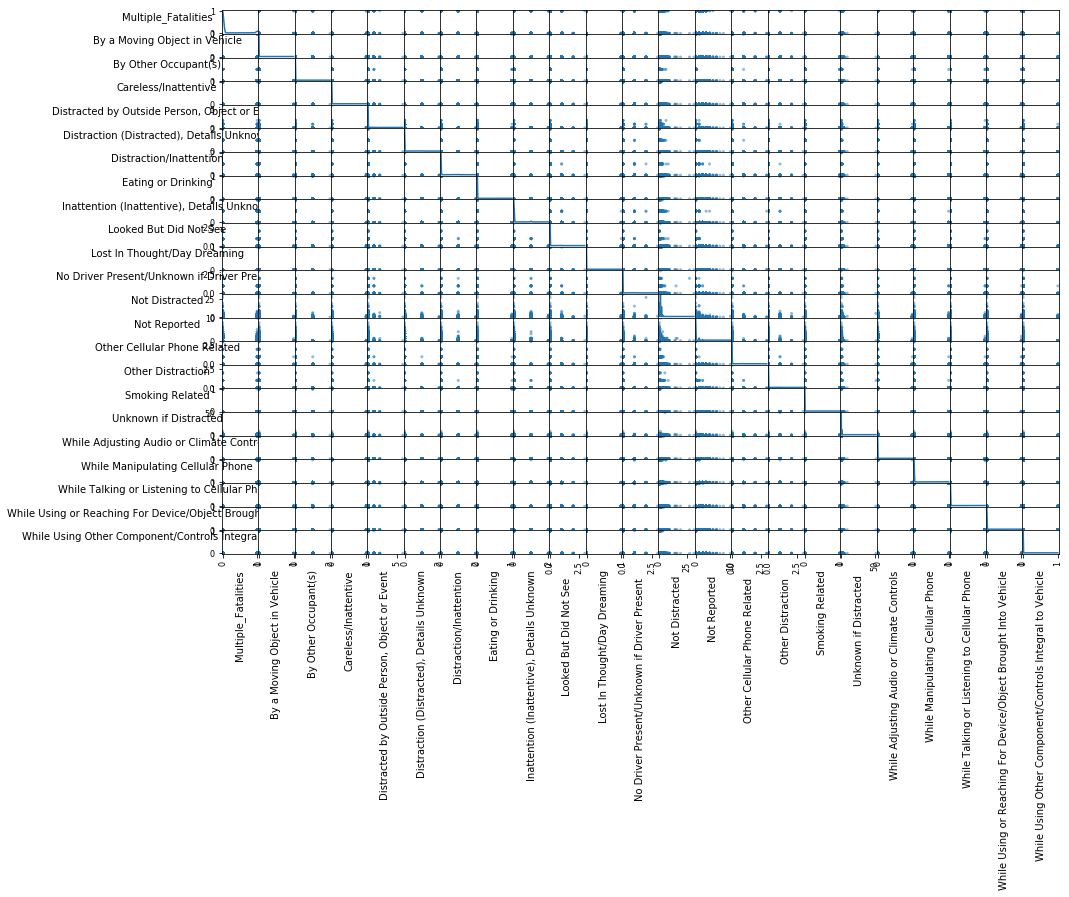

In [24]:
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

ax = scatter_matrix(Accident_forScatter,figsize=(15, 10),diagonal='kde')
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 10,  rotation=0) for item in ax.ravel()]

#x labels
[plt.setp(item.xaxis.get_label(), 'size', 10, rotation=90) for item in ax.ravel()]

#need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1.5,0.5) for s in ax.reshape(-1)]
;

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score


num_estimators = 50
# lets train some trees
clf_array = [
    ('Stump',              DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)),
    ('Tree',               DecisionTreeClassifier()),
    ('Random Trees',       RandomForestClassifier(max_depth=50, n_estimators=num_estimators)),
    ('Extra Random Trees', ExtraTreesClassifier(n_estimators=num_estimators,min_samples_split=2)),
    ('Boosted Tree',       GradientBoostingClassifier(n_estimators=num_estimators)), #takes a long time
    ]

for clf in clf_array:
    acc = cross_val_score(clf[1],X,y)
    print (clf[0], acc.mean())